### Knapsack

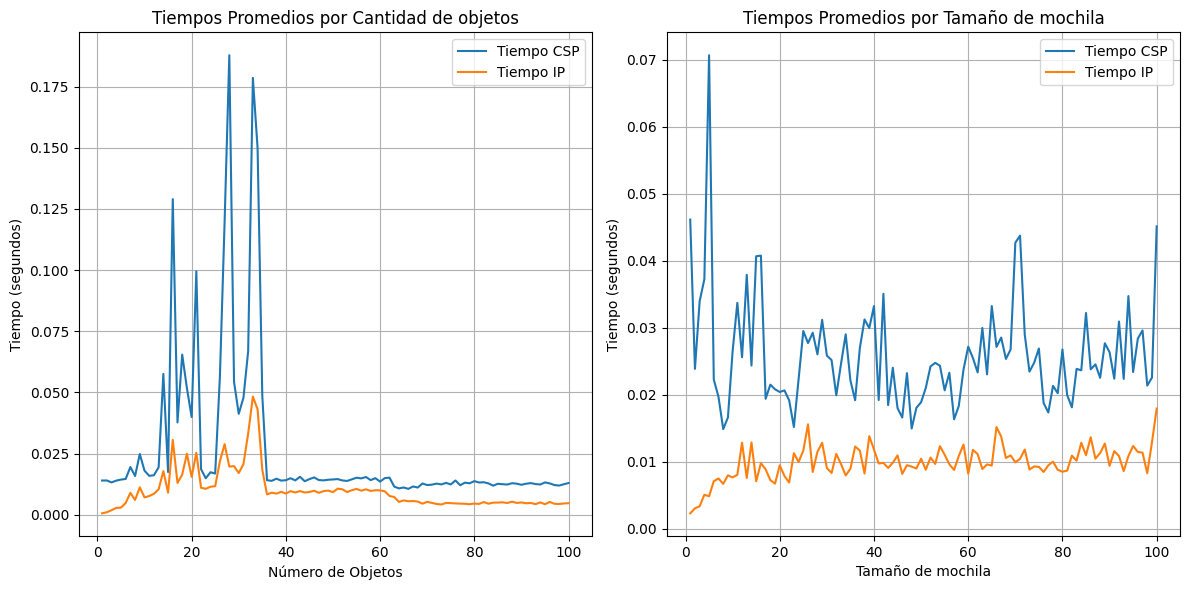

In [14]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('Knapsack/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('Knapsack/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'cantidad de objetos':[],
    'tamaño de mochila':[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = len(datos[key]['description']['weights'])
    m = datos[key]['description']['capacity']

    tabla['cantidad de objetos'].append(n)
    tabla['tamaño de mochila'].append(m)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_n = df[['cantidad de objetos', 'CSP', 'IP']].groupby('cantidad de objetos').mean()

# Promedios por número de aristas
promedio_tiempo_m = df[['tamaño de mochila', 'CSP', 'IP']].groupby('tamaño de mochila').mean()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Cantidad de objetos')
plt.xlabel('Número de Objetos')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por número de aristas
plt.subplot(1, 2, 2)
plt.plot(promedio_tiempo_m.index, promedio_tiempo_m['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_m.index, promedio_tiempo_m['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Tamaño de mochila')
plt.xlabel('Tamaño de mochila')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### K-Colorability

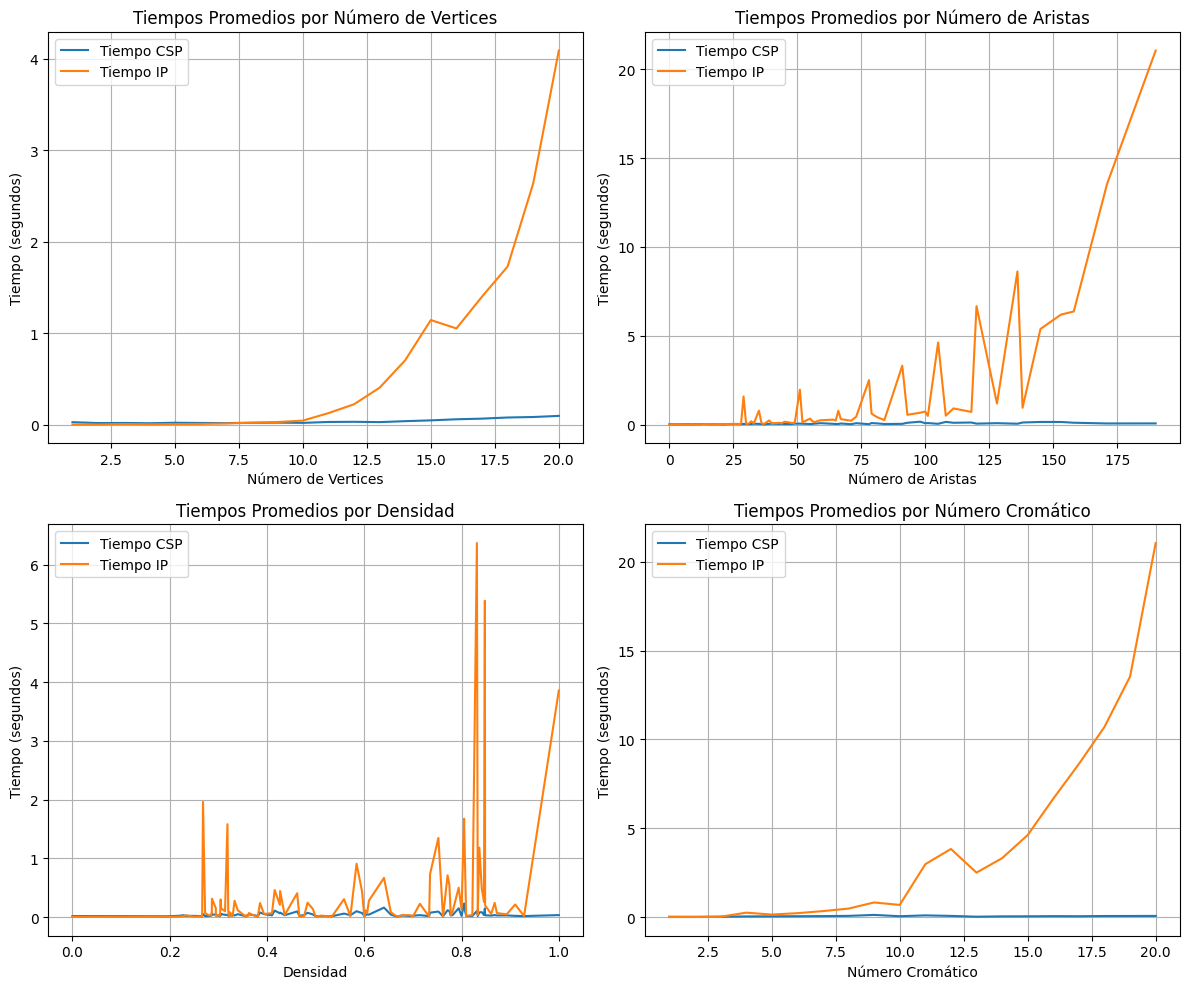

In [15]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('K_Colorability/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('K_Colorability/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vertices':[],
    'numero de aristas':[],
    "densidad":[],
    "numero cromático":[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['description']['vertices']
    m = len(datos[key]['description']['aristas'])
    k = datos[key]["results"][0]["result"]

    tabla['numero de vertices'].append(n)
    tabla['numero de aristas'].append(m)
    tabla["densidad"].append(0 if m==0 else m/(n*(n-1)/2))
    tabla["numero cromático"].append(k)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').mean()

# Promedios por número de aristas
promedio_tiempo_aristas = df[['numero de aristas', 'CSP', 'IP']].groupby('numero de aristas').mean()


# Promedios por densidad
promedio_tiempo_densidad = df[['densidad', 'CSP', 'IP']].groupby('densidad').mean()


# Promedios por número cromático
promedio_tiempo_numero_cromatico = df[['numero cromático', 'CSP', 'IP']].groupby('numero cromático').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número de Vertices')
plt.xlabel('Número de Vertices')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por número de aristas
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número de Aristas')
plt.xlabel('Número de Aristas')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por densidad
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Densidad')
plt.xlabel('Densidad')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Cuarta gráfica: Tiempos promedio por número cromatico
plt.subplot(2, 2, 4)
plt.plot(promedio_tiempo_numero_cromatico.index, promedio_tiempo_numero_cromatico['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_numero_cromatico.index, promedio_tiempo_numero_cromatico['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número Cromático')
plt.xlabel('Número Cromático')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### Traveling Salesman Problem

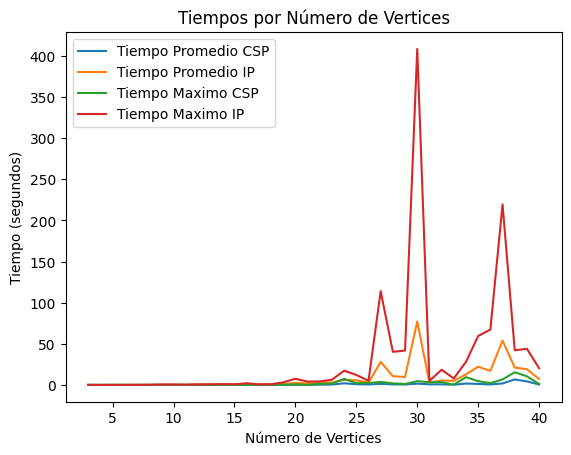

In [16]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('TSP/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('TSP/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vertices':[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['description']['vertices']

    tabla['numero de vertices'].append(n)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').mean()

# Maximos por número de nodos
maximo_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').max()

plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['CSP'], label='Tiempo Promedio CSP')
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['IP'], label='Tiempo Promedio IP')
plt.plot(maximo_tiempo_vertices.index, maximo_tiempo_vertices['CSP'], label='Tiempo Maximo CSP')
plt.plot(maximo_tiempo_vertices.index, maximo_tiempo_vertices['IP'], label='Tiempo Maximo IP')
plt.title('Tiempos por Número de Vertices')
plt.xlabel('Número de Vertices')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.show()


### Bin Packing

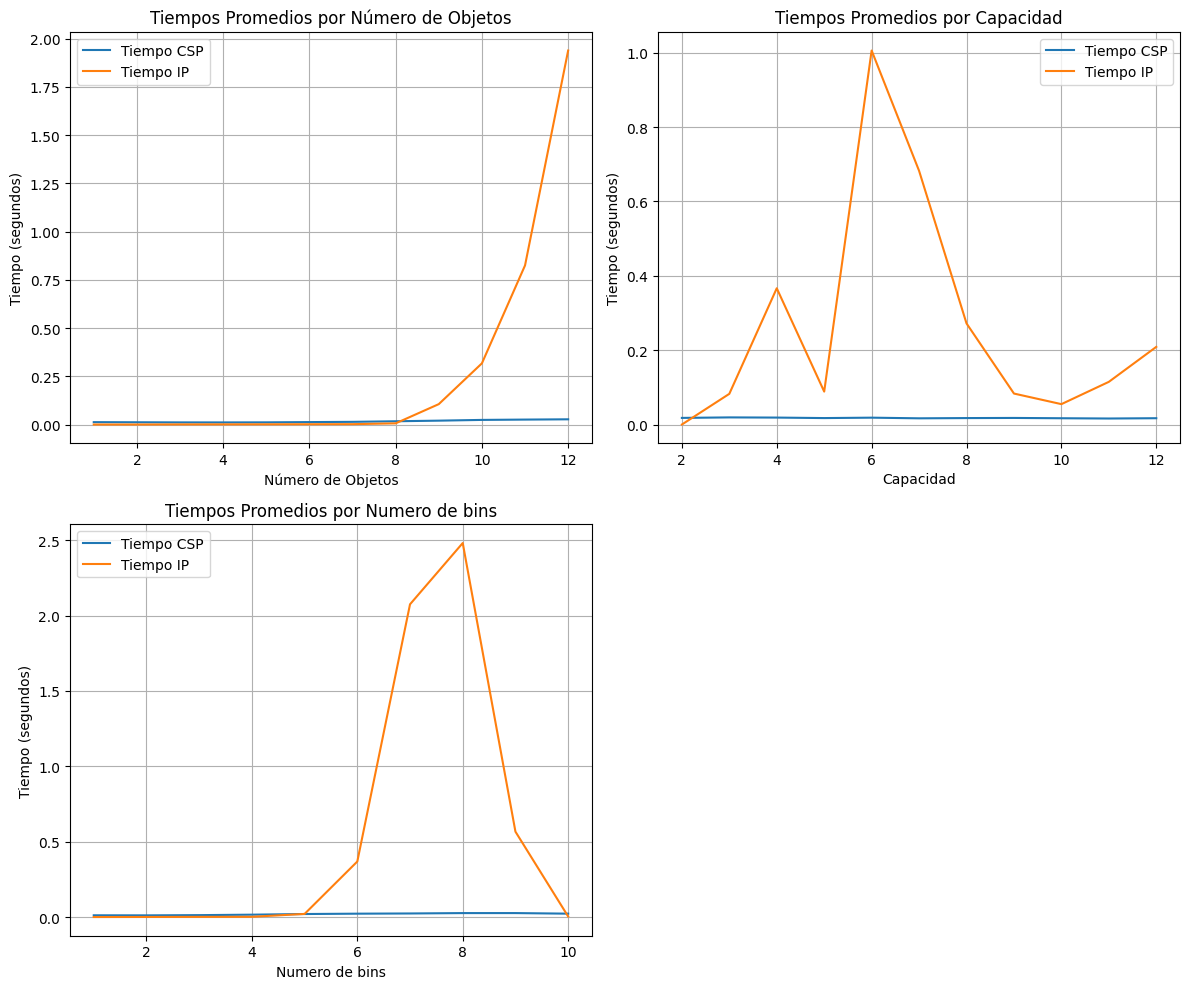

In [18]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

if os.path.exists('BinPacking/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('BinPacking/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de objetos':[],
    "capacidad":[],
    "optimo":[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = len(datos[key]['description']['objects'])
    m = datos[key]['description']['capacity']
    k = int(datos[key]["results"][0]["result"]+0.1)

    tabla['numero de objetos'].append(n)
    tabla['capacidad'].append(m)
    tabla["optimo"].append(k)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

promedio_tiempo_n = df[['numero de objetos', 'CSP', 'IP']].groupby('numero de objetos').mean()

promedio_tiempo_m = df[['capacidad', 'CSP', 'IP']].groupby('capacidad').mean()

promedio_tiempo_k = df[['optimo', 'CSP', 'IP']].groupby('optimo').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número de Objetos')
plt.xlabel('Número de Objetos')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por capacidad
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_m.index, promedio_tiempo_m['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_m.index, promedio_tiempo_m['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Capacidad')
plt.xlabel('Capacidad')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por numero de bins
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_k.index, promedio_tiempo_k['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_k.index, promedio_tiempo_k['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Numero de bins')
plt.xlabel('Numero de bins')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()


# Mostrar las gráficas
plt.tight_layout()
plt.show()

### Set Cover

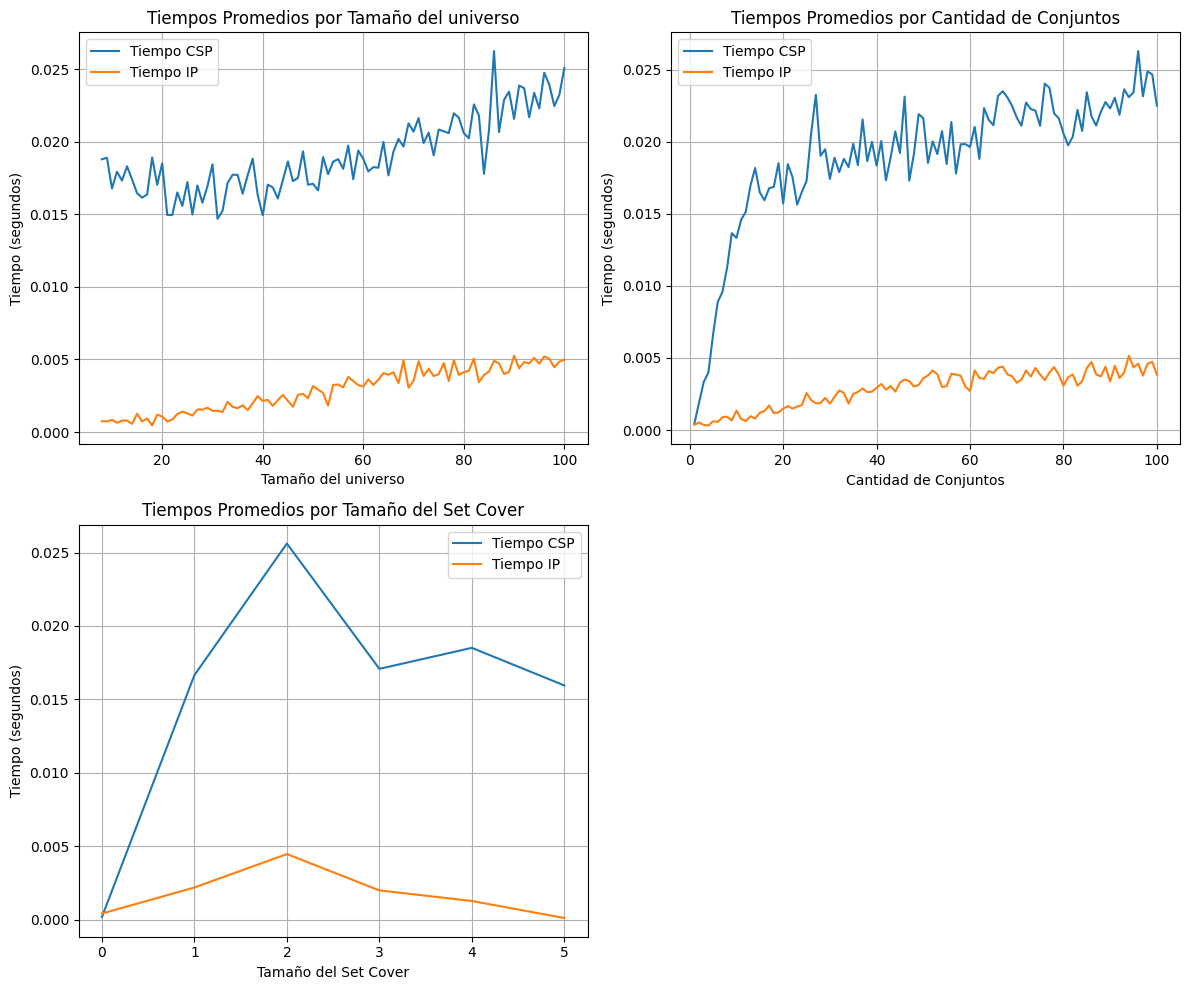

In [10]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('SetCover/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('SetCover/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'universo':[],
    'cantidad de conjuntos':[],
    "optimo":[],
    "CSP":[],
    "IP":[]
}

for key in datos.keys():
    n = len(datos[key]['description']['universe'])
    m = len(datos[key]['description']['sets'])
    k = datos[key]["results"][0]["result"]

    tabla['universo'].append(n)
    tabla['cantidad de conjuntos'].append(m)
    tabla["optimo"].append(k if k!=None else 0)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

# Promedios por tamaño el universo
promedio_tiempo_universo = df[['universo', 'CSP', 'IP']].groupby('universo').mean()

# Promedios por cantidad de conjuntos
promedio_tiempo_conjuntos = df[['cantidad de conjuntos', 'CSP', 'IP']].groupby('cantidad de conjuntos').mean()


# Promedios por optimo
promedio_tiempo_optimo = df[['optimo', 'CSP', 'IP']].groupby('optimo').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_universo.index, promedio_tiempo_universo['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_universo.index, promedio_tiempo_universo['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Tamaño del universo')
plt.xlabel('Tamaño del universo')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por Cantidad de Conjuntos
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_conjuntos.index, promedio_tiempo_conjuntos['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_conjuntos.index, promedio_tiempo_conjuntos['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Cantidad de Conjuntos')
plt.xlabel('Cantidad de Conjuntos')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por tamaño del set cover
plt.subplot(2, 2, 3)
plt.plot(promedio_tiempo_optimo.index, promedio_tiempo_optimo['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_optimo.index, promedio_tiempo_optimo['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Tamaño del Set Cover')
plt.xlabel('Tamaño del Set Cover')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### Max Clique

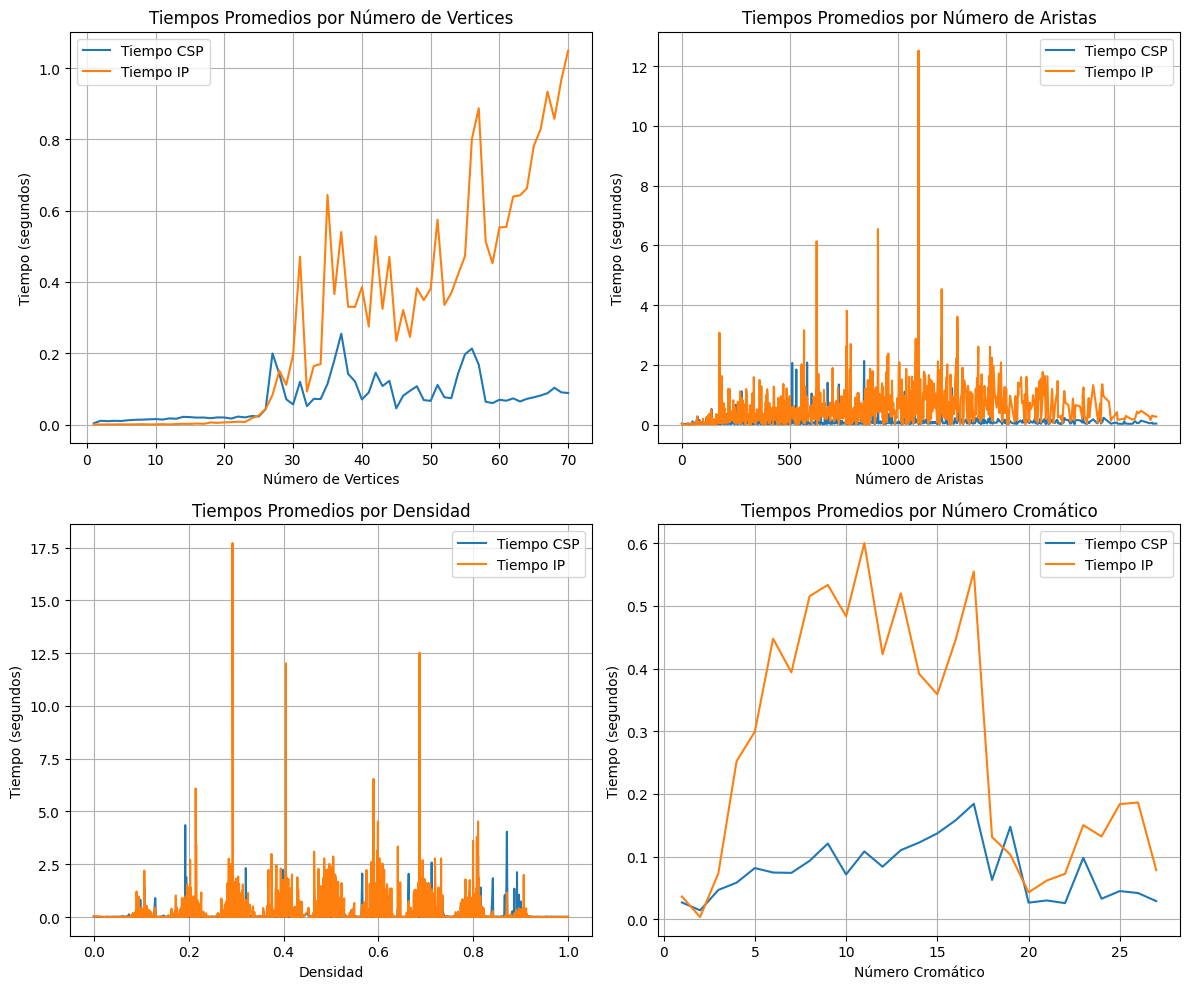

In [12]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.exists('MaxClique/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('MaxClique/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vertices':[],
    'numero de aristas':[],
    "densidad":[],
    "numero cromático":[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['description']['vertices']
    m = sum([sum(x) for x in datos[key]['description']['aristas']])/2
    k = datos[key]["results"][0]["result"]

    tabla['numero de vertices'].append(n)
    tabla['numero de aristas'].append(m)
    tabla["densidad"].append(0 if n<=1 else m/(n*(n-1)/2))
    tabla["numero cromático"].append(k)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempo_vertices = df[['numero de vertices', 'CSP', 'IP']].groupby('numero de vertices').mean()

# Promedios por número de aristas
promedio_tiempo_aristas = df[['numero de aristas', 'CSP', 'IP']].groupby('numero de aristas').mean()


# Promedios por densidad
promedio_tiempo_densidad = df[['densidad', 'CSP', 'IP']].groupby('densidad').mean()


# Promedios por número cromático
promedio_tiempo_numero_cromatico = df[['numero cromático', 'CSP', 'IP']].groupby('numero cromático').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1) # (filas, columnas, índice)
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_vertices.index, promedio_tiempo_vertices['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número de Vertices')
plt.xlabel('Número de Vertices')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por número de aristas
plt.subplot(2, 2, 2)
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_aristas.index, promedio_tiempo_aristas['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número de Aristas')
plt.xlabel('Número de Aristas')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por densidad
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_densidad.index, promedio_tiempo_densidad['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Densidad')
plt.xlabel('Densidad')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Cuarta gráfica: Tiempos promedio por número cromatico
plt.subplot(2, 2, 4)
plt.plot(promedio_tiempo_numero_cromatico.index, promedio_tiempo_numero_cromatico['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_numero_cromatico.index, promedio_tiempo_numero_cromatico['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Número Cromático')
plt.xlabel('Número Cromático')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### Portfolio

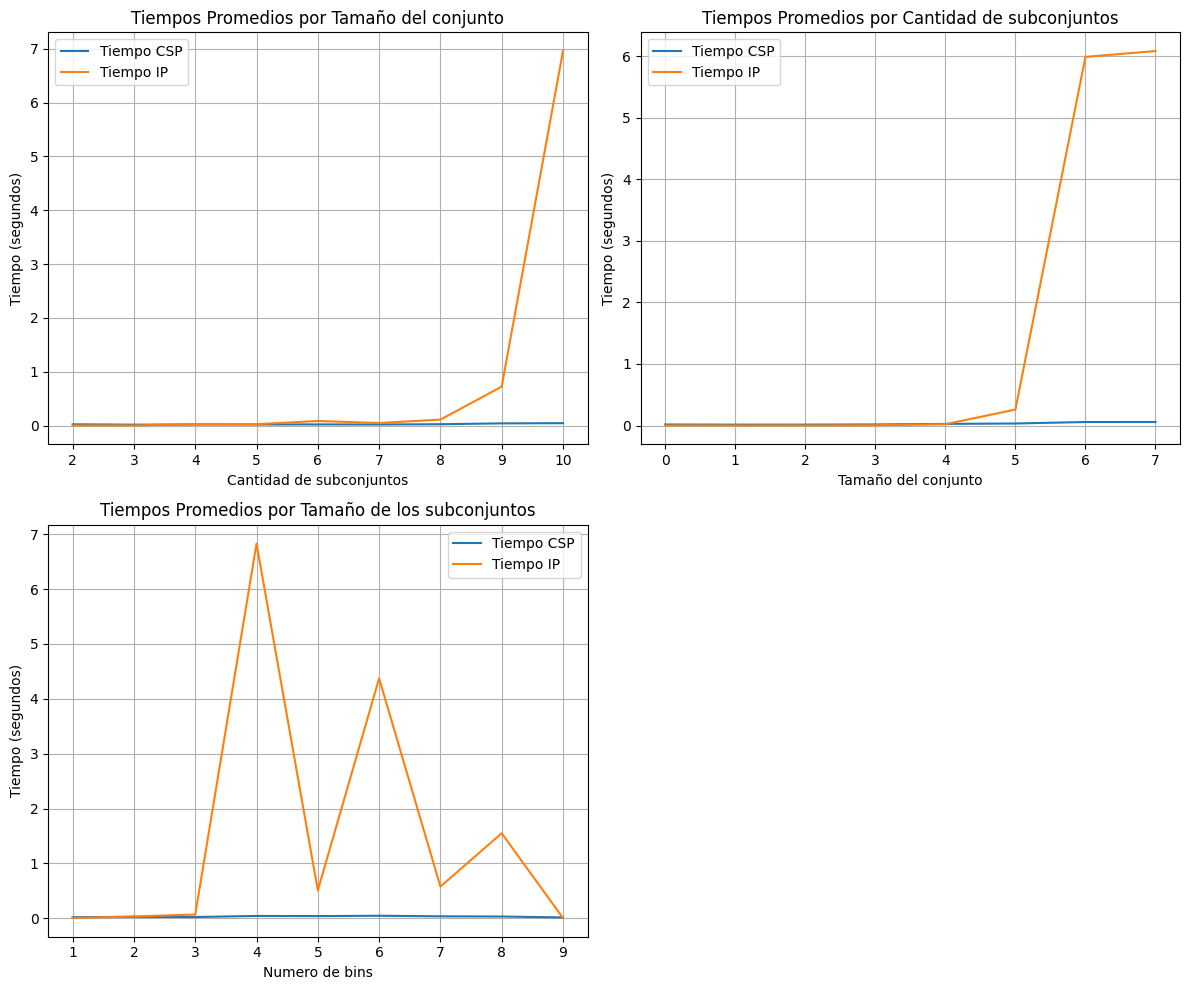

In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

if os.path.exists('Portfolio/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('Portfolio/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'b':[],
    "n":[],
    "r":[],
    "CSP":[],
    "IP":[]
}

for key in datos.keys():
    b = datos[key]['description']['b']
    n = datos[key]['description']['n']
    r = datos[key]['description']['r']

    tabla['b'].append(b)
    tabla['n'].append(n)
    tabla["r"].append(r)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

promedio_tiempo_n = df[['n', 'CSP', 'IP']].groupby('n').mean()

promedio_tiempo_b = df[['b', 'CSP', 'IP']].groupby('b').mean()

promedio_tiempo_r = df[['r', 'CSP', 'IP']].groupby('r').mean()


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 2) # (filas, columnas, índice)
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_n.index, promedio_tiempo_n['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Cantidad de subconjuntos')
plt.xlabel('Tamaño del conjunto')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Segunda gráfica: Tiempos promedio por Tamaño del conjunto
plt.subplot(2, 2, 1)
plt.plot(promedio_tiempo_b.index, promedio_tiempo_b['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_b.index, promedio_tiempo_b['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Tamaño del conjunto')
plt.xlabel('Cantidad de subconjuntos')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()

# Tercera gráfica: Tiempos promedio por Tamaño de los subconjuntos
plt.subplot(2, 2, 3) # (filas, columnas, índice)
plt.plot(promedio_tiempo_r.index, promedio_tiempo_r['CSP'], label='Tiempo CSP')
plt.plot(promedio_tiempo_r.index, promedio_tiempo_r['IP'], label='Tiempo IP')
plt.title('Tiempos Promedios por Tamaño de los subconjuntos')
plt.xlabel('Numero de bins')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid()


# Mostrar las gráficas
plt.tight_layout()
plt.show()

### VRP

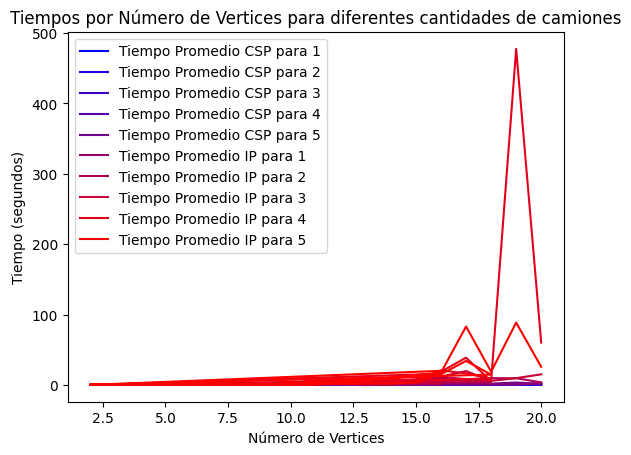

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

if os.path.exists('VRP/data.json'):
        # Leer el contenido existente del archivo JSON
        with open('VRP/data.json', 'r') as f:
            datos = json.load(f)
else:
    # Si no existe, inicializar un nuevo diccionario
    datos = {}

tabla = {
    'numero de vehículos':[],
    'tamaño':[],
    "CSP":[],
    "IP":[]

}

for key in datos.keys():
    n = datos[key]['description']['num_vehicles']

    tabla['numero de vehículos'].append(n)
    m = len(datos[key]['description']['distance_matrix'])

    tabla['tamaño'].append(m)

    for solucion in datos[key]["results"]:
        tabla[solucion['method']].append(solucion['time'])


df = pd.DataFrame(tabla)

# Promedios por número de nodos
promedio_tiempos = df.groupby(['numero de vehículos','tamaño']).mean()

promedio_por_numero_camiones = [sub_df for sub_df in df.groupby('numero de vehículos')]

i=0
color_index=255/(2*len(promedio_por_numero_camiones)-1)

for caso, promedio_por_caso in promedio_por_numero_camiones:
    color = math.ceil(color_index*i)
    plt.plot(
        promedio_por_caso['tamaño'], 
        promedio_por_caso['CSP'], 
        label=f'Tiempo Promedio CSP para {caso}',
        color=f"#{0 if color<16 else ''}{hex(color)[2:]}00{0 if 255-color<16 else ''}{hex(255-color)[2:]}"
)
    i+=1

for caso, promedio_por_caso in promedio_por_numero_camiones:
    color = math.ceil(color_index*i)
    plt.plot(
        promedio_por_caso['tamaño'], 
        promedio_por_caso['IP'], 
        label=f'Tiempo Promedio IP para {caso}',
        color=f"#{0 if color<16 else ''}{hex(color)[2:]}00{0 if 255-color<16 else ''}{hex(255-color)[2:]}"
    )
    i+=1

plt.title('Tiempos por Número de Vertices para diferentes cantidades de camiones')
plt.xlabel('Número de Vertices')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.show()
